# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import better_tensorflow as btf

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

x_mlp = [
      [[1, 1]],
      [[2, 3],[3, 3]],
]

btf.train_mlp(x_mlp, [], [], 1_000_000, [2], "", True, False, False, 0.01)

print(btf.predict_mlp([1, 1], [], True, True))  # 0
print(btf.predict_mlp([2, 3], [], True, True))  # 1
print(btf.predict_mlp([3, 3], [], True, True))  # 1


0
0
0
[[0.0, 0.0], [0.5, 0.5]]
[[0.0, 0.0], [0.5, 0.5]]
[[0.0, 0.0], [0.5, 0.5]]


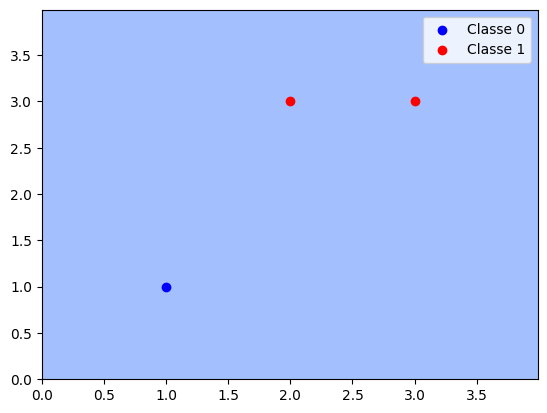

<Figure size 640x480 with 0 Axes>

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([btf.predict_mlp(point, [], True, False) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[0, 0], X[0, 1], color='blue', label='Classe 0')
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', label='Classe 1')
plt.legend()
plt.show()
plt.clf()


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [7]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

x_mlp = [[X[0:50,0], X[0:50, 1]],
         [X[50:100,0], X[50:100,1]]
           ]

x_mlp = [[],[]]

for i in range(50):
    x_mlp[0].append([X[i,0], X[i,1]])
for i in range(50):
    x_mlp[1].append([X[i+50,0], X[i+50,1]])

btf.train_mlp(x_mlp, [], [], 1_000_000, [2], "", True, False, False, 0.01)

result = 0
index = 0
for i in range(2):
      for x in x_mlp[i]:
            if btf.predict_mlp(x, [], True, False) == i :
                  result += 1
            index += 1



In [8]:
print(result * 100 / index)

50.0


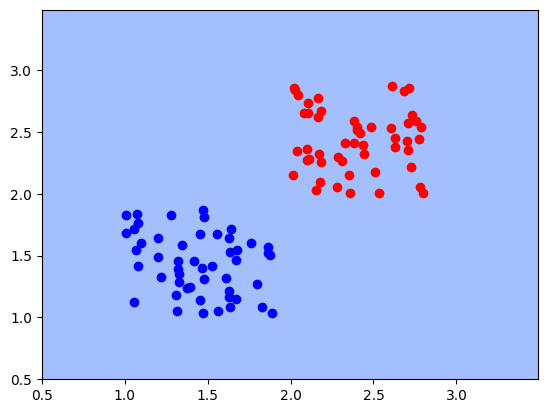

<Figure size 640x480 with 0 Axes>

In [10]:
xx, yy = np.meshgrid(np.arange(0.5, 3.5, 0.01), np.arange(0.5, 3.5, 0.01))
Z = np.array([btf.predict_mlp([x, y], [], True,False) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [2]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

x_mlp = [
    [[0, 0], [1, 1]],
    [[1, 0], [0, 1]]
]

btf.train_mlp(x_mlp, [], [], 1_000_000, [2,2], "", True, False, False, 0.01)

print(btf.predict_mlp([1, 1], [], True, True)) # 0
print(btf.predict_mlp([0, 0], [], True, True)) # 0
print(btf.predict_mlp([1, 0], [], True, True)) # 1
print(btf.predict_mlp([0, 1], [], True, True)) # 1

0
0
0
0
[[1.0, 1.0], [0.0, 0.0], [0.5, 0.5]]
[[0.5, 0.5], [0.0, 0.0], [0.5, 0.5]]
[[0.9999994, 0.9999994], [0.0, 0.0], [0.5, 0.5]]
[[0.9999994, 0.9999994], [0.0, 0.0], [0.5, 0.5]]


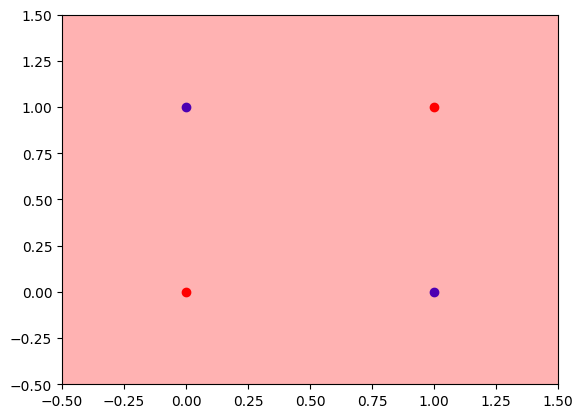

In [3]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4, 0], X[2:4, 1], color='red')

xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([btf.predict_mlp(point, [], True, False) for point in grid])
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.3, levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'])
plt.show()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [5]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])


x_mlp = [[],[]]
for i in range(500):
    index = 0 if Y[i] == 1 else 1
    x_mlp[index].append([X[i,0], X[i,1]])


btf.train_mlp(x_mlp, [], [], 1_000_000, [2,4], "", True, False, False, 0.01)

result = 0
nb = 0
for i in range(2):
     for x in x_mlp[i]:
            if btf.predict_mlp(x, [], True, False) == i :
                  result += 1
            index += 1


In [6]:
print(result * 100 / index)

52.6


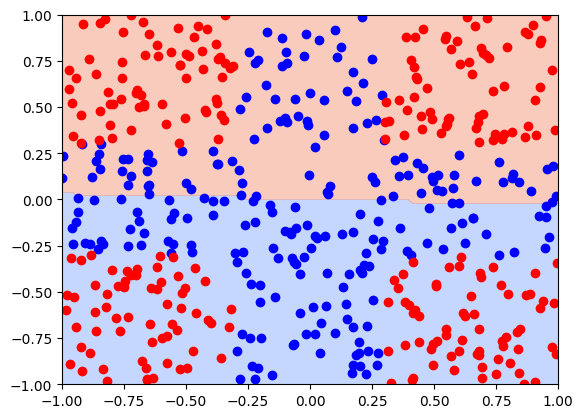

<Figure size 640x480 with 0 Axes>

In [8]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([btf.predict_mlp(point, [], True, False) for point in grid])
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.5, levels=np.arange(-0.5, 2, 1), cmap='coolwarm')

plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:, 1], color='blue')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:, 1], color='red')

plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [9]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

x_mlp = [[],[],[]]
for i in range(len(X)):
    index = 0
    for y in range(len(Y[i])):
        if Y[i][y] == 1:
            index = y
    x_mlp[index].append([X[i,0], X[i,1]])



btf.train_mlp(x_mlp, [], [], 1_000_000, [2], "", True, False, False, 0.01)

result = 0
nb = 0
for i in range(2):
     for x in x_mlp[i]:
            if btf.predict_mlp(x, [], True, False) == i :
                  result += 1
            index += 1



In [10]:
print(result * 100 / index)

58.44155844155844


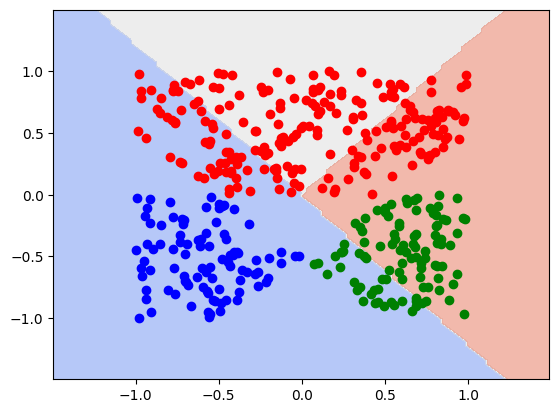

<Figure size 640x480 with 0 Axes>

In [11]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
Z = np.array([btf.predict_mlp([x, y], [], True, False) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, levels=np.arange(-0.5, 3, 1), cmap='coolwarm')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:, 1], color='blue')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:, 1], color='red')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:, 1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [13]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])


x_mlp = [[],[],[]]
for i in range(len(X)):
    index = 0
    for y in range(len(Y[i])):
        if Y[i][y] == 1:
            index = y
    x_mlp[index].append([X[i,0], X[i,1]])



btf.train_mlp(x_mlp, [], [], 1_000_000, [2], "", True, False, False, 0.01)

result = 0
nb = 0
for i in range(2):
     for x in x_mlp[i]:
            if btf.predict_mlp(x, [], True, False) == i :
                  result += 1
            index += 1

In [14]:
print(result * 100 / index)

59.356136820925556


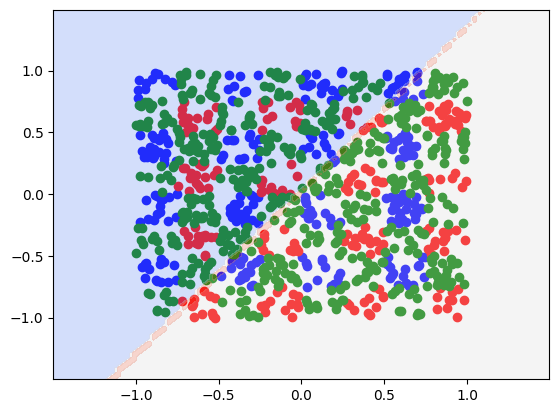

<Figure size 640x480 with 0 Axes>

In [15]:
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:, 1], color='blue')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:, 1], color='red')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:, 1], color='green')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
Z = np.array([btf.predict_mlp([x, y], [], True, False) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 3, 1), cmap='coolwarm')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [16]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

x_mlp = [[[1]],[[2]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [1], "", False, False, False, 0.01)

print(btf.predict_mlp([1], [], False, True)) # 2
print(btf.predict_mlp([2], [], False, True)) # 3

2
3
[[0.9972052], [1.9971348, 2.995702]]
[[0.99999213], [2.0027163, 3.0040743]]


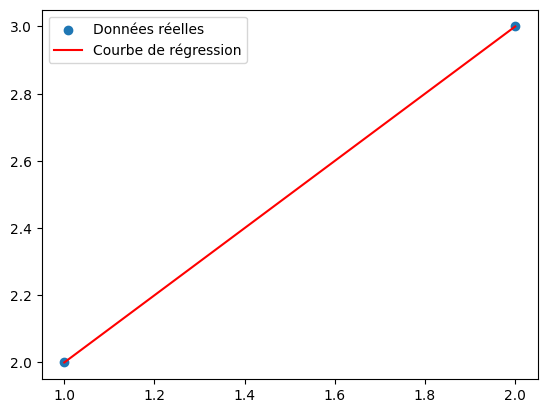

<Figure size 640x480 with 0 Axes>

In [17]:
plt.scatter(X, Y, label="Données réelles")
X_sorted = np.sort(X, axis=0)
Y_pred = np.array([btf.predict_mlp(x, [], False, False) for x in X_sorted])
plt.plot(X_sorted, Y_pred, color="red", label="Courbe de régression")
plt.legend()
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [19]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

x_mlp = [[[1]],[[2]],[[3]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [1,4], "", False, False, False, 0.01)

print(btf.predict_mlp([1], [], False, True))
print(btf.predict_mlp([2], [], False, True))
print(btf.predict_mlp([3], [], False, True))

2
2
2
[[0.99382377], [0.03926894, 0.8425484, 0.35968506, 0.85987616], [1.9977093, 2.9975274, 2.4983342]]
[[0.9999614], [0.03853074, 0.8439177, 0.35886517, 0.86122066], [2.0012088, 3.0013, 2.5008745]]
[[0.99999976], [0.038526166, 0.8439262, 0.35886, 0.86122906], [2.0012305, 3.0013235, 2.5008903]]


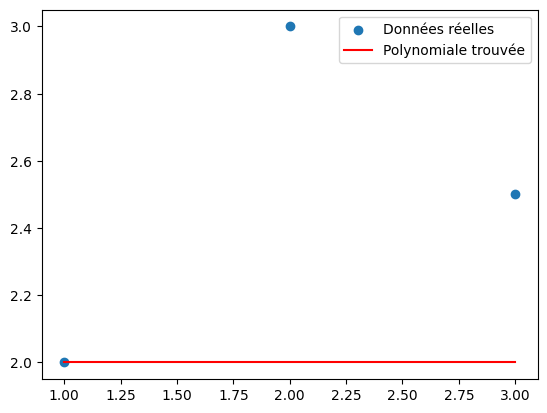

<Figure size 640x480 with 0 Axes>

In [21]:
plt.scatter(X, Y, label="Données réelles")
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_pred_smooth = np.array([btf.predict_mlp(x, [], False, False) for x in X_smooth])
plt.plot(X_smooth, Y_pred_smooth, color="red", label="Polynomiale trouvée")
plt.legend()
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [12]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

x_mlp = [[[1,1]],[[2,2]],[[3,1]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [2], "", False, False, False, 0.01)

print(btf.predict_mlp([1,1], [], False, True))
print(btf.predict_mlp([2,2], [], False, True))
print(btf.predict_mlp([3,1], [], False, True))

0[[0.0, 0.0], [0.0, 0.0, 0.0]]

0
0
[[0.0, 0.0], [0.0, 0.0, 0.0]]
[[0.0, 0.0], [0.0, 0.0, 0.0]]


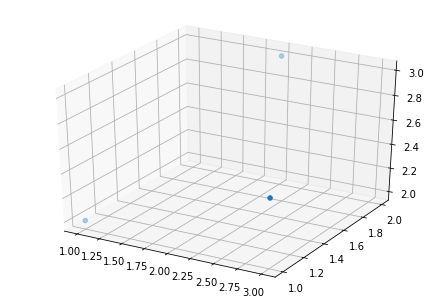

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [13]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

x_mlp = [[[1,1]],[[2,2]],[[3,3]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [2], "", False, False, False, 0.01)

print(btf.predict_mlp([1], [], False, True))
print(btf.predict_mlp([2], [], False, True))
print(btf.predict_mlp([3], [], False, True))

0[[0.0, 0.0], [0.0, 0.0, 0.0]]

0
0
[[0.0, 0.0], [0.0, 0.0, 0.0]]
[[0.0, 0.0], [0.0, 0.0, 0.0]]


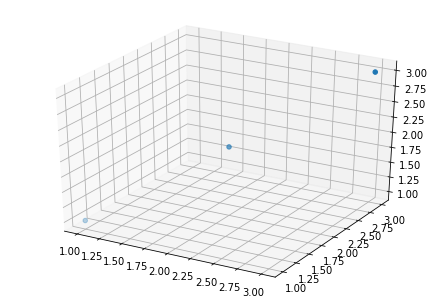

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [14]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

x_mlp = [[[1,0]],[[0,1]],[[1,1]],[[0,0]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [2,2], "", False, False, False, 0.01)

print(btf.predict_mlp([1,0], [], False, True))
print(btf.predict_mlp([0,1], [], False, True))
print(btf.predict_mlp([1,1], [], False, True))
print(btf.predict_mlp([0,0], [], False, True))

0
0
-1
-1
[[0.18325713, 0.5001744], [0.6700771, 0.61453956], [1.9999862, 0.9999931, -1.9999838, -0.9999931]]
[[0.29892194, 0.5000989], [0.6700809, 0.6145357], [1.9999862, 0.9999931, -1.9999869, -0.9999931]]
[[0.08731483, 0.5002733], [0.67008525, 0.6145508], [2.0000165, 1.0000081, -2.0000124, -1.0000082]]
[[0.5, 0.5], [0.67009765, 0.6145361], [2.000013, 1.0000066, -2.0000203, -1.0000066]]


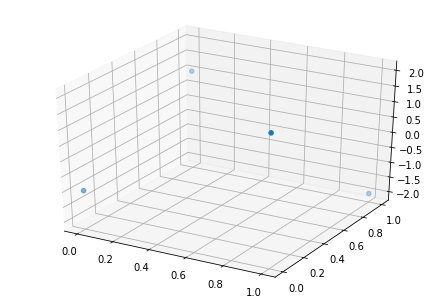

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()